# Import Data

In [1]:
# clear memory
%reset -f

# helper.py
from helper import *
gc.collect()

0

In [37]:
# load data and sort
df = pd.read_csv('./data/clean/pff_fantasy_data.csv').sort_values(by=['Key', 'Exp']).reset_index(drop=True)

# get injury-related cols
injury_cols = ['Player', 'Tm', 'Pos', 'Key', 'Year', 'Age', 'Exp', 'G', 'GS', 'games_played_pct', 'Scrim_Yds', 'Touches', 'Team_Pass Blocking Grade', 'Team_Run Blocking Grade', 'Team_Win%', 
               'Pass_Att', 'Pass_aimed_passes', 'Pass_avg_depth_of_target', 'Pass_avg_time_to_throw', 'Pass_def_gen_pressures', 'Pass_dropbacks', 'Pass_hit_as_threw', 'Pass_sacks', 
               'Rush_Att', 'Rush_Yds', 'Rush_avoided_tackles', 'Rush_explosive', 'Rush_gap_attempts', 'Rush_zone_attempts', 
               'Rec_Tgt', 'Rec_Rec', 'Rec_Yds', 'Rec_avg_depth_of_target', 'Rec_avoided_tackles', 'Rec_contested_receptions', 'Rec_contested_targets', 'Rec_inline_snaps', 'Rec_longest', 'Rec_routes', 'Rec_slot_snaps', 'Rec_wide_snaps']
df = df[injury_cols]

# target is games played in next season
df['target'] = df.groupby('Key')['games_played_pct'].shift(-1)

# show shape and nulls
show_shape_and_nulls(df)

Shape: (11559, 42)
Null values:


,Player,Tm,Pos,Key,Year,Age,Exp,G,GS,games_played_pct,Scrim_Yds,Touches,Team_Pass Blocking Grade,Team_Run Blocking Grade,Team_Win%,Pass_Att,Pass_aimed_passes,Pass_avg_depth_of_target,Pass_avg_time_to_throw,Pass_def_gen_pressures,Pass_dropbacks,Pass_hit_as_threw,Pass_sacks,Rush_Att,Rush_Yds,Rush_avoided_tackles,Rush_explosive,Rush_gap_attempts,Rush_zone_attempts,Rec_Tgt,Rec_Rec,Rec_Yds,Rec_avg_depth_of_target,Rec_avoided_tackles,Rec_contested_receptions,Rec_contested_targets,Rec_inline_snaps,Rec_longest,Rec_routes,Rec_slot_snaps,Rec_wide_snaps,target
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3014


- The only null values are held in the "Target" column (indicating players in their final season). We cannot use rows without a target to train, so they will be dropped here.

# Create Features

In [38]:
# aggregate data by player
features = create_injury_features(df)

# show shape and nulls
show_shape_and_nulls(features)

Shape: (11559, 212)
Null values:


,Age,Exp,G,GS,GS_2y_mean,GS_2y_std,GS_3y_mean,GS_3y_std,GS_career_mean,G_2y_mean,G_2y_std,G_3y_mean,G_3y_std,G_career_mean,Key,Pass_Att,Pass_Att_2y_mean,Pass_Att_2y_std,Pass_Att_3y_mean,Pass_Att_3y_std,Pass_Att_career_mean,Pass_aimed_passes,Pass_aimed_passes_2y_mean,Pass_aimed_passes_2y_std,Pass_aimed_passes_3y_mean,Pass_aimed_passes_3y_std,Pass_aimed_passes_career_mean,Pass_avg_depth_of_target,Pass_avg_depth_of_target_2y_mean,Pass_avg_depth_of_target_2y_std,Pass_avg_depth_of_target_3y_mean,Pass_avg_depth_of_target_3y_std,Pass_avg_depth_of_target_career_mean,Pass_avg_time_to_throw,Pass_avg_time_to_throw_2y_mean,Pass_avg_time_to_throw_2y_std,Pass_avg_time_to_throw_3y_mean,Pass_avg_time_to_throw_3y_std,Pass_avg_time_to_throw_career_mean,Pass_def_gen_pressures,Pass_def_gen_pressures_2y_mean,Pass_def_gen_pressures_2y_std,Pass_def_gen_pressures_3y_mean,Pass_def_gen_pressures_3y_std,Pass_def_gen_pressures_career_mean,Pass_dropbacks,Pass_dropbacks_2y_mean,Pass_dropbacks_2y_std,Pass_dropbacks_3y_mean,Pass_dropbacks_3y_std,Pass_dropbacks_career_mean,Pass_hit_as_threw,Pass_hit_as_threw_2y_mean,Pass_hit_as_threw_2y_std,Pass_hit_as_threw_3y_mean,Pass_hit_as_threw_3y_std,Pass_hit_as_threw_career_mean,Pass_sacks,Pass_sacks_2y_mean,Pass_sacks_2y_std,Pass_sacks_3y_mean,Pass_sacks_3y_std,Pass_sacks_career_mean,Player,Pos,Rec_Rec,Rec_Rec_2y_mean,Rec_Rec_2y_std,Rec_Rec_3y_mean,Rec_Rec_3y_std,Rec_Rec_career_mean,Rec_Tgt,Rec_Tgt_2y_mean,Rec_Tgt_2y_std,Rec_Tgt_3y_mean,Rec_Tgt_3y_std,Rec_Tgt_career_mean,Rec_Yds,Rec_Yds_2y_mean,Rec_Yds_2y_std,Rec_Yds_3y_mean,Rec_Yds_3y_std,Rec_Yds_career_mean,Rec_avg_depth_of_target,Rec_avg_depth_of_target_2y_mean,Rec_avg_depth_of_target_2y_std,Rec_avg_depth_of_target_3y_mean,Rec_avg_depth_of_target_3y_std,Rec_avg_depth_of_target_career_mean,Rec_avoided_tackles,Rec_avoided_tackles_2y_mean,Rec_avoided_tackles_2y_std,Rec_avoided_tackles_3y_mean,Rec_avoided_tackles_3y_std,Rec_avoided_tackles_career_mean,Rec_contested_receptions,Rec_contested_receptions_2y_mean,Rec_contested_receptions_2y_std,Rec_contested_receptions_3y_mean,Rec_contested_receptions_3y_std,Rec_contested_receptions_career_mean,Rec_contested_targets,Rec_contested_targets_2y_mean,Rec_contested_targets_2y_std,Rec_contested_targets_3y_mean,Rec_contested_targets_3y_std,Rec_contested_targets_career_mean,Rec_inline_snaps,Rec_inline_snaps_2y_mean,Rec_inline_snaps_2y_std,Rec_inline_snaps_3y_mean,Rec_inline_snaps_3y_std,Rec_inline_snaps_career_mean,Rec_longest,Rec_longest_2y_mean,Rec_longest_2y_std,Rec_longest_3y_mean,Rec_longest_3y_std,Rec_longest_career_mean,Rec_routes,Rec_routes_2y_mean,Rec_routes_2y_std,Rec_routes_3y_mean,Rec_routes_3y_std,Rec_routes_career_mean,Rec_slot_snaps,Rec_slot_snaps_2y_mean,Rec_slot_snaps_2y_std,Rec_slot_snaps_3y_mean,Rec_slot_snaps_3y_std,Rec_slot_snaps_career_mean,Rec_wide_snaps,Rec_wide_snaps_2y_mean,Rec_wide_snaps_2y_std,Rec_wide_snaps_3y_mean,Rec_wide_snaps_3y_std,Rec_wide_snaps_career_mean,Rush_Att,Rush_Att_2y_mean,Rush_Att_2y_std,Rush_Att_3y_mean,Rush_Att_3y_std,Rush_Att_career_mean,Rush_Yds,Rush_Yds_2y_mean,Rush_Yds_2y_std,Rush_Yds_3y_mean,Rush_Yds_3y_std,Rush_Yds_career_mean,Rush_avoided_tackles,Rush_avoided_tackles_2y_mean,Rush_avoided_tackles_2y_std,Rush_avoided_tackles_3y_mean,Rush_avoided_tackles_3y_std,Rush_avoided_tackles_career_mean,Rush_explosive,Rush_explosive_2y_mean,Rush_explosive_2y_std,Rush_explosive_3y_mean,Rush_explosive_3y_std,Rush_explosive_career_mean,Rush_gap_attempts,Rush_gap_attempts_2y_mean,Rush_gap_attempts_2y_std,Rush_gap_attempts_3y_mean,Rush_gap_attempts_3y_std,Rush_gap_attempts_career_mean,Rush_zone_attempts,Rush_zone_attempts_2y_mean,Rush_zone_attempts_2y_std,Rush_zone_attempts_3y_mean,Rush_zone_attempts_3y_std,Rush_zone_attempts_career_mean,Scrim_Yds,Scrim_Yds_2y_mean,Scrim_Yds_2y_std,Scrim_Yds_3y_mean,Scrim_Yds_3y_std,Scrim_Yds_career_mean,Team_Pass Blocking Grade,Team_Pass Blocking Grade_2y_mean,Team_Pass Blocking Grade_2y_std,Team_Pass Blocking Grade_3y_mean,Team_Pass Blocking Grade_3y_std,Team_

In [39]:
# get 2024 features
features_2024 = features[features['Year'] == 2024].copy()

# drop players with null target values
features = features.dropna(subset='target')

# check
features.isna().sum().sum()

0

# Positional Subsets

In [40]:
# get positional subsets
qb, rb, wr_te = get_pos_subsets(features)

# show shapes
qb.shape, rb.shape, wr_te.shape

((1172, 140), (2434, 164), (4939, 164))

# Baseline
- Baseline RMSE scores for the 3 positional subsets using an XGBoost with 1000 trees.

In [41]:
# base
for pos, data in zip(['QB', 'RB', 'WR/TE'], [qb, rb, wr_te]):
    # cross validate
    model = XGBRegressor(n_jobs=-1, random_state=SEED, n_estimators=1000)
    summary = cross_val(df=data, target_col='target', estimator=model)

    # show results
    print(f'--- {pos} ---')
    display(summary)

--- QB ---


,train_rmse,train_r2,val_rmse,val_r2
mean,0.000742,9.999955e-01,0.282660,0.345475
std,0.000067,7.987502e-07,0.010447,0.040900


--- RB ---


,train_rmse,train_r2,val_rmse,val_r2
mean,0.000979,0.999989,0.310782,-0.079870
std,0.000075,0.000002,0.006155,0.040387


--- WR/TE ---


,train_rmse,train_r2,val_rmse,val_r2
mean,0.001271,0.999981,0.295263,-0.003606
std,0.000120,0.000003,0.003252,0.062283


- The train metrics are almost perfect, with much worse validation scores.
- We will run 100 iterations of bayesian optimization on each positional group to regularize and bring the validation scores down.

# Optimize XGBoost

In [6]:
# get X and y for the 3 subsets
X_qb, y_qb = get_X_y(qb)
X_rb, y_rb = get_X_y(rb)
X_wr_te, y_wr_te = get_X_y(wr_te)

# define the parameter search space
param_bounds = {'max_depth': (1, 10),
    'learning_rate': (0.0001, 0.01),
    'gamma': (0, 1),
    'subsample': (0, 1),
    'colsample_bytree': (0, 1),
    'min_child_weight': (0, 10)}

# bayesian optimize
optim_qb = run_bayes_opt(X_qb, y_qb, param_bounds, SEED)
optim_rb = run_bayes_opt(X_rb, y_rb, param_bounds, SEED)
optim_wr_te = run_bayes_opt(X_wr_te, y_wr_te, param_bounds, SEED)

|   iter    |  target   | colsam... |   gamma   | learni... | max_depth | min_ch... | subsample |
-------------------------------------------------------------------------------------------------
| 1         | -0.2747   | 0.01037   | 0.5019    | 0.005008  | 2.204     | 1.421     | 0.2186    |
| 2         | -0.2784   | 0.4185    | 0.2481    | 0.0009322 | 4.109     | 1.668     | 0.8786    |
| 3         | -0.2658   | 0.951     | 0.03875   | 0.007021  | 6.155     | 8.98      | 0.6669    |
| 4         | -0.2621   | 0.5478    | 0.7024    | 0.003926  | 7.25      | 8.249     | 0.4657    |
| 5         | -0.2651   | 0.9405    | 0.8037    | 0.009835  | 2.527     | 5.211     | 0.9455    |
| 6         | -0.2646   | 0.6495    | 0.8608    | 0.009711  | 2.67      | 2.431     | 0.8734    |
| 7         | -0.2625   | 0.9063    | 0.7583    | 0.003534  | 5.172     | 6.105     | 0.4963    |
| 8         | -0.2612   | 0.478     | 0.4356    | 0.008717  | 2.686     | 6.877     | 0.7035    |
| 9         | -0.262

In [41]:
# get best params
best_params_qb = {'colsample_bytree': 0.43694933789520995,
   'gamma': 0.1687261753552669,
   'learning_rate': 0.00493095400140084,
   'max_depth': 3,
   'min_child_weight': 7,
   'subsample': 0.30777013495996075}
best_params_rb = {'colsample_bytree': 0.4031653096656833,
   'gamma': 0.6124494902543016,
   'learning_rate': 0.006323095660510614,
   'max_depth': 3,
   'min_child_weight': 9,
   'subsample': 0.5390985810270512}
best_params_wr_te = {'colsample_bytree': 0.43694933789520995,
   'gamma': 0.1687261753552669,
   'learning_rate': 0.00493095400140084,
   'max_depth': 3,
   'min_child_weight': 7,
   'subsample': 0.30777013495996075}

# define models
xgb_qb = XGBRegressor(**best_params_qb, n_estimators=1000, random_state=SEED, n_jobs=-1)
xgb_rb = XGBRegressor(**best_params_rb, n_estimators=1000, random_state=SEED, n_jobs=-1)
xgb_wr_te = XGBRegressor(**best_params_wr_te, n_estimators=1000, random_state=SEED, n_jobs=-1)

# 2024 Predictions
Here we will train on the 2006-2022 data and then use the 2023 data as the holdout test set to predict the 2024 grades.

In [18]:
# get 2024 predictions for each position
print('--- QB ---')
qb_preds = get_2024_preds(qb, xgb_qb)
print('--- RB ---')
rb_preds = get_2024_preds(rb, xgb_rb)
print('--- WR/TE ---')
wr_te_preds = get_2024_preds(wr_te, xgb_wr_te)

--- QB ---
RMSE: 0.2408
R2: 0.4322

--- RB ---
RMSE: 0.2825
R2: 0.0999

--- WR/TE ---
RMSE: 0.2608
R2: 0.2446



- Injury predictions are roughly 25% off on average.

# 2025 Predictions

In [42]:
# get X and y for the 3 subsets
X_qb, y_qb = get_X_y(qb)
X_rb, y_rb = get_X_y(rb)
X_wr_te, y_wr_te = get_X_y(wr_te)

In [43]:
# get positional subsets for 2024
qb_2024, rb_2024, wr_te_2024 = get_pos_subsets(features_2024)

# fit models on all other data (1970-2023)
xgb_qb.fit(X_qb, y_qb)
xgb_rb.fit(X_rb, y_rb)
xgb_wr_te.fit(X_wr_te, y_wr_te)

# split WR and TE
wr_2024 = wr_te_2024.query('Pos == "WR"')
te_2024 = wr_te_2024.query('Pos == "TE"')

# get 2025 predictions for each position
qb_preds_2025 = get_2025_preds(qb_2024, xgb_qb)
rb_preds_2025 = get_2025_preds(rb_2024, xgb_rb)
wr_preds_2025 = get_2025_preds(wr_2024, xgb_wr_te)
te_preds_2025 = get_2025_preds(te_2024, xgb_wr_te)

In [44]:
# combine
preds_2025 = pd.concat([qb_preds_2025, rb_preds_2025, wr_preds_2025, te_preds_2025], axis=0).reset_index(drop=True)[['player', 'team', 'pos', 'y_pred']]

# rename pred col
preds_2025 = preds_2025.rename(columns={'y_pred': 'games_played_pct_pred'})

# save
preds_2025.to_csv('./data/clean/injury_predictions_2025.csv', index=False)

# load pff_ppg_preds
ppg_preds = pd.read_csv('./data/clean/pff_ppg_predictions_2025.csv')

# merge
preds_2025 = preds_2025.merge(ppg_preds, how='left', on=['player', 'team', 'pos'])

# calculate adj_pred
preds_2025['adj_pred'] = preds_2025['games_played_pct_pred'] * preds_2025['ppg_pred']
preds_2025 = preds_2025.sort_values('adj_pred', ascending=False).reset_index(drop=True)

# group by pos and add rank col
preds_2025['pos_rank'] = preds_2025.groupby('pos')['adj_pred'].rank(ascending=False, method='first')

# save
preds_2025.to_csv('./data/clean/predictions_2025.csv', index=False)

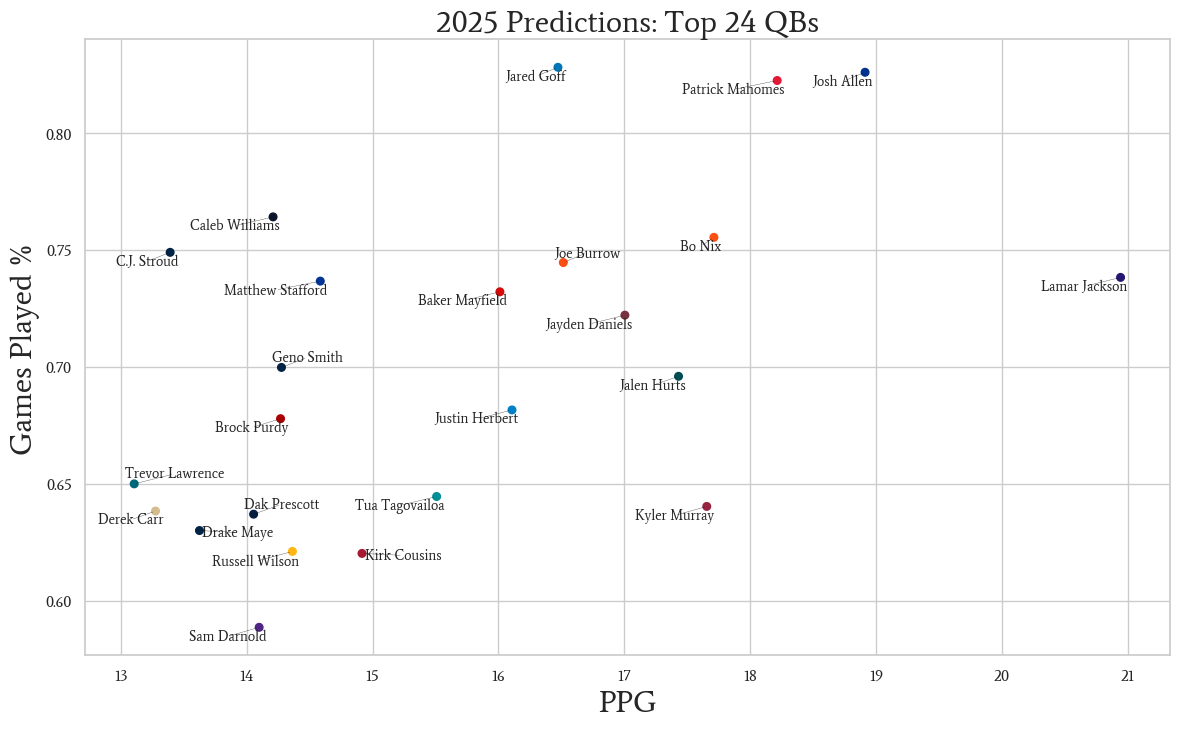

In [11]:
# QB
plot_adj_preds(preds_2025.query('pos == "QB"').head(24), 'QB')

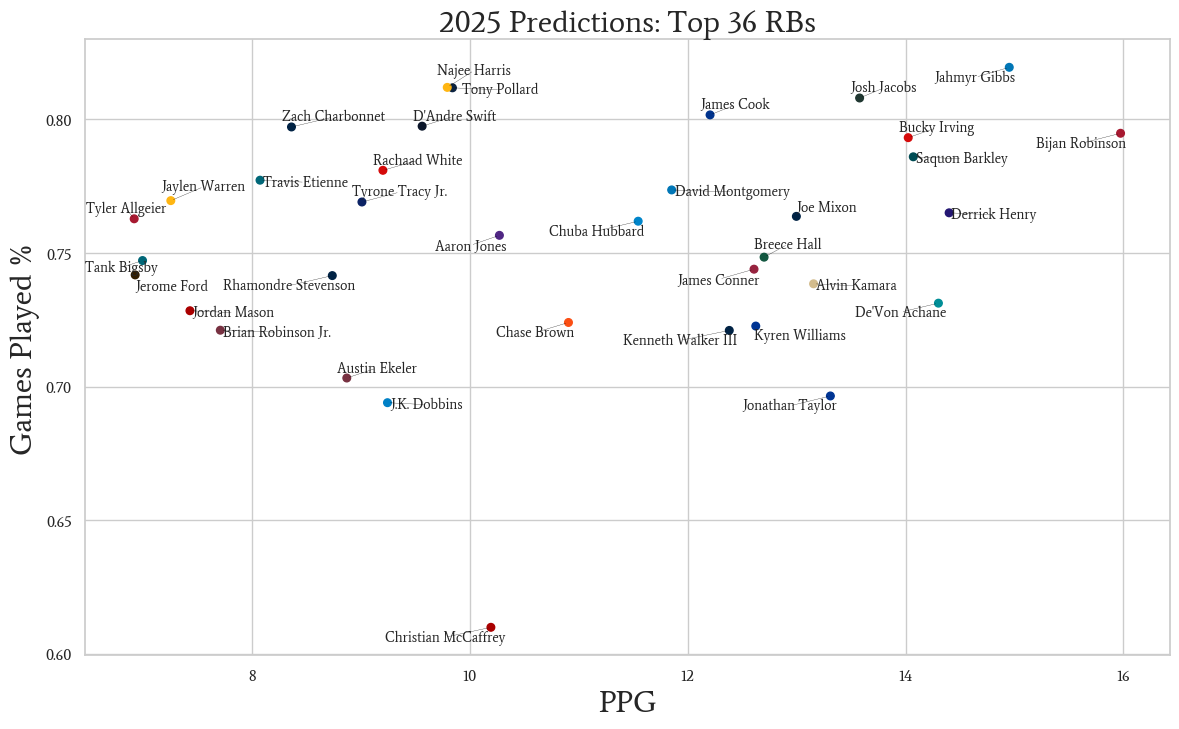

In [12]:
# RB
plot_adj_preds(preds_2025.query('pos == "RB"').head(36), 'RB')

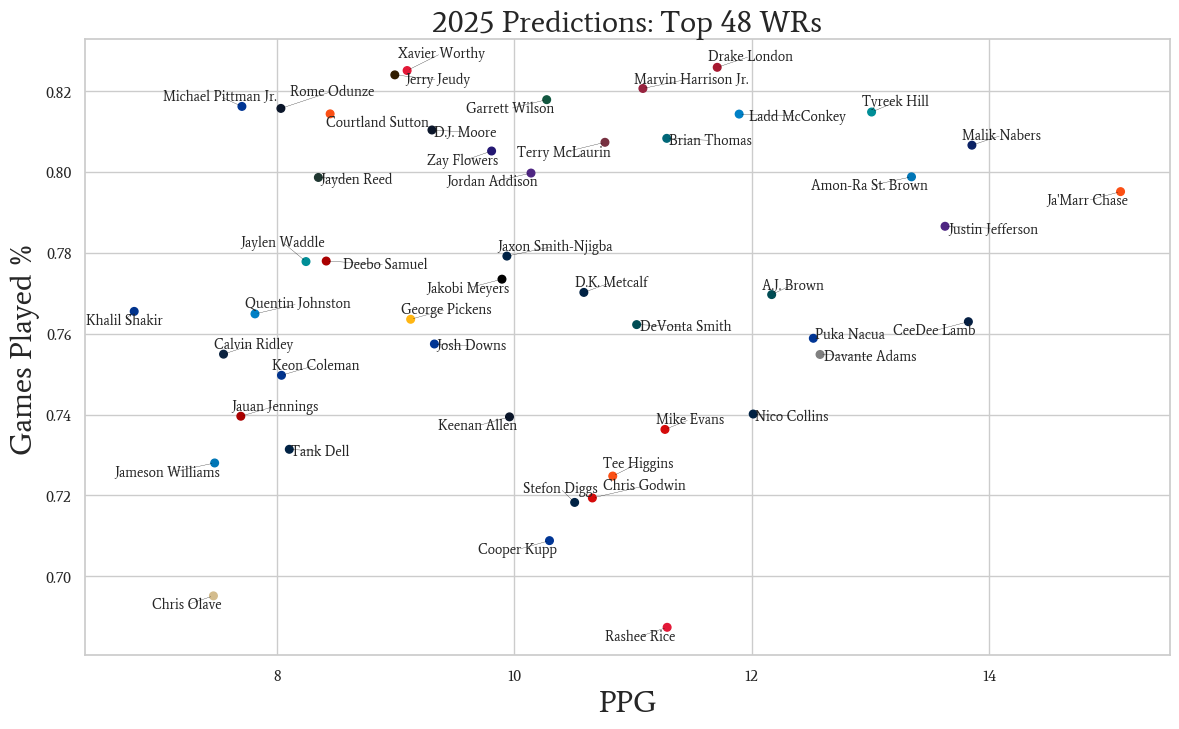

In [13]:
# WR
plot_adj_preds(preds_2025.query('pos == "WR"').head(48), 'WR')

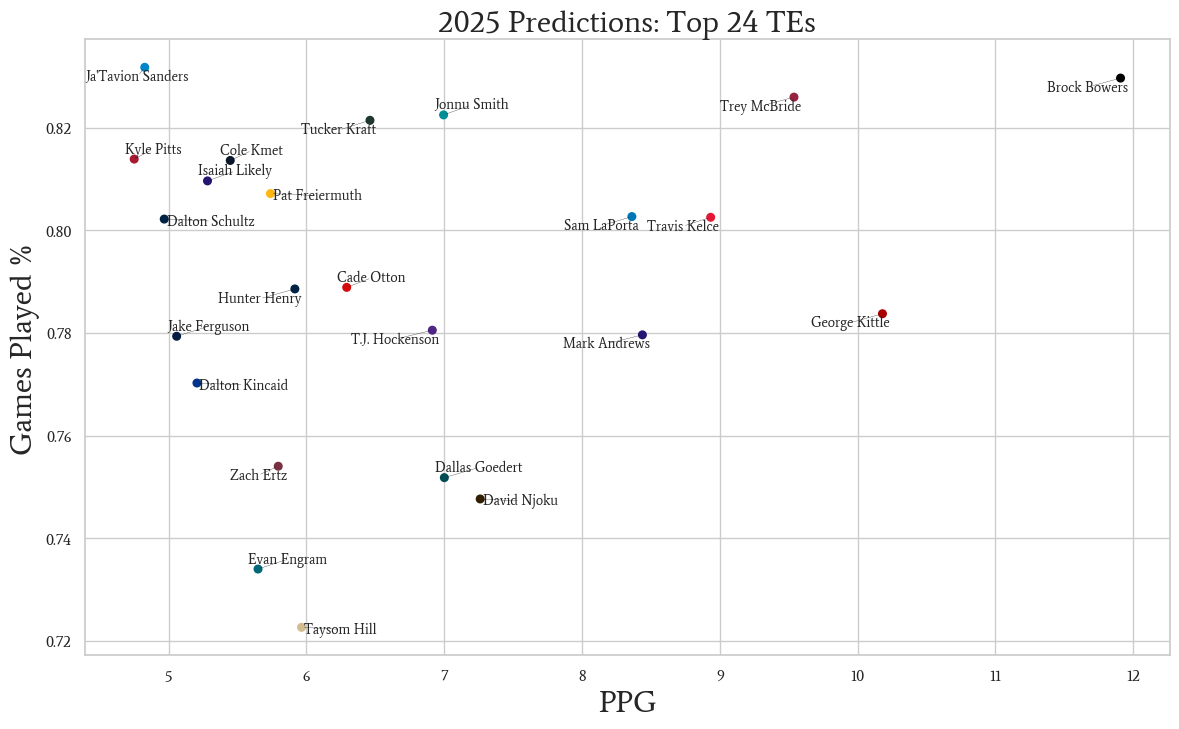

In [14]:
# TE
plot_adj_preds(preds_2025.query('pos == "TE"').head(24), 'TE')